# Splice junctions analysis

## K562 sample https://www.encodeproject.org/files/ENCFF201FDK/

In this case we will analyse the K562 sample as an example. In case of wanting to analyse any other sample, just change the csv file containing the output of regtools junctions annotate of the sample of interest.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
## the next line allows us to visualize the plots generated with matplotlib inside the notebook.
%matplotlib inline

In [2]:
# Here we select the csv file contining the splice junctions of the sample of interest
data_K562 = pd.read_csv("AnnoJunctions_Heart.csv")
len(data_K562)
data_K562

,chrom,start,end,name,score,strand,splice_site,acceptors_skipped,exons_skipped,donors_skipped,anchor,known_donor,known_acceptor,known_junction,gene_names,gene_ids,transcripts
0,chr1,16765,16858,JUNC00000001,4,-,GT-AG,0,0,0,DA,1,1,1,WASH7P,ENSG00000227232.5,ENST00000488147.1
1,chr1,17055,17233,JUNC00000002,124,-,GT-AG,0,0,0,DA,1,1,1,WASH7P,ENSG00000227232.5,ENST00000488147.1
2,chr1,17368,17606,JUNC00000003,41,-,GT-AG,0,0,1,DA,1,1,1,WASH7P,ENSG00000227232.5,ENST00000488147.1
3,chr1,17368,17526,JUNC00000004,1,-,GT-AG,0,0,1,A,0,1,0,WASH7P,ENSG00000227232.5,ENST00000488147.1
4,chr1,17742,17915,JUNC00000005,9,-,GT-AG,0,0,0,DA,1,1,1,WASH7P,ENSG00000227232.5,ENST00000488147.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188823,chrY,25465661,25473460,JUNC00201406,3,+,GT-AG,0,0,0,DA,1,1,1,AC006328.2,ENSG00000284380.1,ENST00000623198.2
188824,chrY,25490870,25492268,JUNC00201407,2,+,GT-AG,0,0,0,N,0,0,0,NaN,NaN,NaN
188825,chrY,26279177,26279266,JUNC00201408,2,-,GT-AG,0,0,0,DA,1,1,1,PPP1R12BP1,ENSG00000229238.3,ENST00000367272.4
188826,chrY,26281629,26291048,JUNC00201409,2,-,GT-AG,0,0,0,DA,1,1,1,PPP1R12BP1,ENSG00000229238.3,ENST00000367272.4


In [3]:
# The following line allows us to make a first filtering on the number of reads for all splice forms. 
#In this case we will work with the raw data and filter the sum of reads of all the splice forms in a splice junction.
K562_10 = data_K562.loc[data_K562['score'] >= 0]

In [4]:
## some statistics for each variable
K562_10.describe()

,start,end,score,acceptors_skipped,exons_skipped,donors_skipped,known_donor,known_acceptor,known_junction
count,1.888280e+05,1.888280e+05,188828.000000,188828.000000,188828.000000,188828.000000,188828.000000,188828.000000,188828.000000
mean,7.672537e+07,7.673195e+07,84.491389,0.535556,0.299495,0.611350,0.863039,0.854826,0.760946
std,5.609841e+07,5.609863e+07,933.897870,1.956420,1.484090,2.097791,0.343807,0.352278,0.426507
min,1.660000e+02,1.326000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.282143e+07,3.282500e+07,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,6.428977e+07,6.430416e+07,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.124729e+08,1.124828e+08,37.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.489168e+08,2.489173e+08,153692.000000,174.000000,169.000000,170.000000,1.000000,1.000000,1.000000


We will separate the data according to whether they belong to the + or - strand. Then, we will select the duplicates and
count the constitutive splicing events. Later, we will join both duplicated datasets to continue with the analysis.

In [5]:
K562_minus = K562_10.loc[K562_10['strand'] == "-"]

In [6]:
# Now we are selecting the Single Source splice forms (they share the same start position)
K562_SS_minus = K562_minus[K562_minus.duplicated(subset = ['end'], keep = False)]

In [7]:
# Now we are selecting the Single Target splice forms (they share the same end position)
K562_ST_minus = K562_minus[K562_minus.duplicated(subset = ['start'], keep = False)]

In [8]:
K562_plus = K562_10.loc[K562_10['strand'] == "+"]

In [9]:
# Now we are selecting the Single Source splice forms (they share the same start position)
K562_SS_plus = K562_plus[K562_plus.duplicated(subset = ['start'], keep = False)]

In [10]:
# Now we are selecting the Single Tartget  splice forms (they share the same end position)
K562_ST_plus = K562_plus[K562_plus.duplicated(subset = ['end'], keep = False)]

In [11]:
# Number of alternatively spliced forms in this dataset
AS = (len(K562_SS_plus)+len(K562_ST_plus)+len(K562_SS_minus)+len(K562_ST_minus))
AS

112648

In [12]:
# Percentage of splice forms that, from the total of splice forms after filtering, are detected as part of an alternatively spliced junction
(len(K562_SS_plus)+len(K562_ST_plus)+len(K562_SS_minus)+len(K562_ST_minus))/len(K562_10)


0.5965640688880887

In [13]:
# Number of constitutively spliced junctions:
const = len(K562_10) - (len(K562_SS_plus)+len(K562_ST_plus)+len(K562_SS_minus)+len(K562_ST_minus))
const

76180

In [14]:
AS + const == len(K562_10)

True

### Spliced forms number for a given splice junction
We want to study how many spliced states or forms do the splice junctions have.


With the following code chunk we can generate a dataframe that contains the number of spliced forms detected for each spliced junction start position. It includes the constitutive spliced forms.

If we want to analyse only the splice forms that have a minimum number of reads, we should filter them on code chunk 3.

In [15]:
end_repetitions = K562_10["end"].value_counts()
end_repetitions = end_repetitions.to_frame()
end_repetitions.rename(columns = {'end':'number_spliced_forms'}, inplace = True)

In [16]:
repetitions = K562_10['start'].value_counts()
repetitions = repetitions.to_frame()
repetitions.rename(columns = {'start':'number_spliced_forms'}, inplace = True)

In [17]:
index_end = pd.Index(end_repetitions.index)
index_start = pd.Index(repetitions.index)
common_index = index_end.intersection(index_start)

In [18]:
index_end
repetitions.iloc[:,1:3]

""
17877067
17876833
17876914
17876851
46293043
...
45714079
38125506
45476627
92639900


In [19]:
df_two_strands = pd.concat([repetitions, end_repetitions])

In [20]:
df_two_strands.to_csv('number_splice_forms_K562_0.csv')

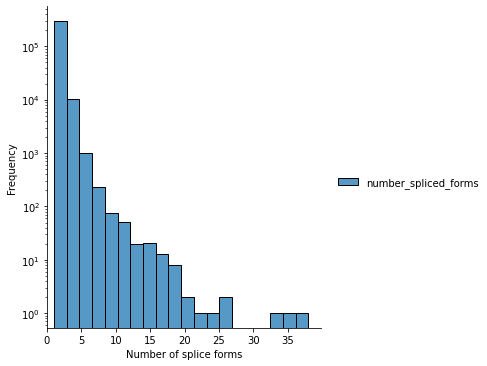

In [21]:
plot1 = sns.displot(data=df_two_strands, 
              color = 'black')
plot1.set(xlabel='Number of splice forms', ylabel='Frequency')
plot1.set(yscale="log")
plot1.set(xlim=(0, None))
plt.show()

We now can explore how many splice forms do the splice junctions further. 

In [22]:
len(df_two_strands)

309828

In [23]:
df_two_strands.describe()

,number_spliced_forms
count,309828.000000
mean,1.218921
std,0.653242
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,38.000000


## First type of filtering: after the sum of the common scores of a splice junction

In [24]:
filt_SS_plus = K562_SS_plus.groupby('start')['score'].sum()
filt_SS_plus = filt_SS_plus.to_frame()
filtered_SS_plus = filt_SS_plus.loc[filt_SS_plus['score'] >= 10]
filtered_SS_plus.reset_index(inplace=True)
common_SS_plus = K562_SS_plus.merge(filtered_SS_plus, on=["start"], copy=False)

In [25]:
filt_ST_plus = K562_ST_plus.groupby('end')['score'].sum()
filt_ST_plus = filt_ST_plus.to_frame()
filtered_ST_plus = filt_ST_plus.loc[filt_ST_plus['score'] >= 10]
filtered_ST_plus.reset_index(inplace=True)
common_ST_plus = K562_ST_plus.merge(filtered_ST_plus, on=["end"], copy=False)

In [26]:
filt_ST_minus = K562_ST_minus.groupby('start')['score'].sum()
filt_ST_minus = filt_ST_minus.to_frame()
filtered_ST_minus = filt_ST_minus.loc[filt_ST_minus['score'] >= 10]
filtered_ST_minus.reset_index(inplace=True)
common_ST_minus = K562_ST_minus.merge(filtered_ST_minus, on=["start"], copy=False)

In [27]:
filt_SS_minus = K562_SS_minus.groupby('end')['score'].sum()
filt_SS_minus = filt_SS_minus.to_frame()
filt_SS_minus[0:20]

,score
end,
11707,14
12972,3
13855,2
14621,2
19281,3
22933,2
26291,11
29238,2
29279,11


In [28]:
filt_SS_minus = filt_SS_minus.loc[filt_SS_minus['score'] >= 10]
len(filt_SS_minus)

9474

In [29]:
## With this line we de-select the end positions as an index value and a default index is set.
filt_SS_minus.reset_index(inplace=True)

In [30]:
common_SS_minus = K562_SS_minus.merge(filt_SS_minus, on=["end"], copy=False)

In [31]:
len(K562_SS_minus)

28433

In [32]:
K562_SS_minus.loc[K562_SS_minus['end'] == 11251]

,chrom,start,end,name,score,strand,splice_site,acceptors_skipped,exons_skipped,donors_skipped,anchor,known_donor,known_acceptor,known_junction,gene_names,gene_ids,transcripts


Next, I need to create dataframes with only the position and the score to do the entropy analysis. 

In [33]:
ncommon_SS_minus = common_SS_minus[['end', 'score_x']]

In [34]:
ncommon_ST_minus = common_ST_minus[['start', 'score_x']]
ncommon_ST_plus = common_ST_plus[['end', 'score_x']]
ncommon_SS_plus = common_SS_plus[['start', 'score_x']]

In [35]:
ncommon_ST_plus = common_ST_plus[['end', 'score_x']]

Next, we use the function defined below to calculate the probability strings

In [36]:
def probability_splice_sites(splice_sites_dataframe):
# variable declaration
    i=0
    total = 0
    start_section = []
    total_score_for_duplicates = 0
    probability_string = []
    total_prob_string = []
    mylist = []
    splice_sites_dataframe.columns = ['start_end_pos', 'score']
    # iteration trough the length of new_kidney, that contains all the duplicated splice forms (the probability of the single splice forms is always 1)
    for i in range((len(splice_sites_dataframe)-1)):
        if splice_sites_dataframe["start_end_pos"][i] == splice_sites_dataframe["start_end_pos"][i+1]:
            start_section.append(i)
            start_section.append(i+1)
            # generation of a list that contains all the spliced forms groups that share a common start position
            mylist = list(dict.fromkeys(start_section))
        else:
        # iteration using the index list to calculate the total scores of the different spliced forms of a splice junction
            for n in mylist:
                total_score_for_duplicates += splice_sites_dataframe["score"].loc[n]
        # second iteration that calculates a new string with the probabilities of every spliced form according to their scores
            for z in mylist:
                probability_string.append(splice_sites_dataframe["score"].loc[z]/total_score_for_duplicates)
            total_prob_string.append(probability_string)
        # resetting of variables
            total_score_for_duplicates = 0
            start_section = []
            probability_string = []
    return(total_prob_string)


In [37]:
prob_ST_plus = probability_splice_sites(ncommon_ST_plus)

In [38]:
prob_SS_plus = probability_splice_sites(ncommon_SS_plus)

In [39]:
prob_SS_minus = probability_splice_sites(ncommon_SS_minus)

In [40]:
prob_ST_minus = probability_splice_sites(ncommon_ST_minus)

In [41]:
## Function to calculate the Shannon entropy
import numpy as np
import math
shannon_entropy_values = []

def shannon_entropy(x):
    return x * np.log(x)

In [42]:
individual_SE_ST_plus = list(map(shannon_entropy, prob_ST_plus))
individual_SE_ST_minus = list(map(shannon_entropy, prob_ST_minus))
individual_SE_SS_plus = list(map(shannon_entropy, prob_SS_plus))
individual_SE_SS_minus = list(map(shannon_entropy, prob_SS_minus))

In [43]:
i = 0
normalized_entropy_grupo_SS_plus = []
for i in individual_SE_SS_plus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = (sum(grupo)*-1)/np.log(n)
    normalized_entropy_grupo_SS_plus.append(entropia_normalizada_grupo)

In [44]:
i = 0
normalized_entropy_grupo_ST_plus = []
for i in individual_SE_ST_plus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = (sum(grupo)*-1)/np.log(n)
    normalized_entropy_grupo_ST_plus.append(entropia_normalizada_grupo)

In [45]:
i = 0
normalized_entropy_grupo_SS_minus = []
for i in individual_SE_SS_minus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = (sum(grupo)*-1)/np.log(n)
    normalized_entropy_grupo_SS_minus.append(entropia_normalizada_grupo)

In [46]:
i = 0
normalized_entropy_grupo_ST_minus = []
for i in individual_SE_ST_minus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = (sum(grupo)*-1)/np.log(n)
    normalized_entropy_grupo_ST_minus.append(entropia_normalizada_grupo)

In [47]:
entropy_twostrands = normalized_entropy_grupo_SS_plus + normalized_entropy_grupo_SS_minus + normalized_entropy_grupo_ST_plus + normalized_entropy_grupo_ST_minus

In [48]:
normalized_entropy_grupo_lista = pd.DataFrame(entropy_twostrands)
normalized_entropy_grupo_lista.to_csv('new_version_normalized_entropy_groups_brain_10.csv')

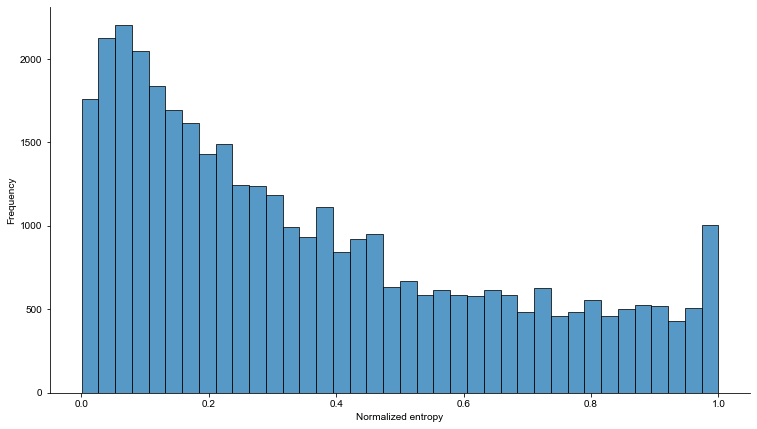

In [49]:
ax = sns.displot(data=normalized_entropy_grupo_lista, 
              color = 'black', legend = False)
ax.set(xlabel='Normalized entropy', ylabel='Frequency')
ax.fig.set_size_inches(12,6)
sns.set_style("darkgrid")

plt.show()

## Second type of filtering: before joining the junctions
In this case we would have to return to code chunk 3 and filter the splice forms individually to keep only the ones which have a number of reads higher than the threshold selected. 

In [50]:
new_SS_K562_minus = K562_SS_minus[['end', 'score']]
new_SS_K562_minus = new_SS_K562_minus.sort_values(by = 'end', ascending = True)

In [51]:
new_ST_K562_minus = K562_ST_minus[['start', 'score']]

In [52]:
new_SS_K562_plus = K562_SS_plus[['start', 'score']]

In [53]:
new_ST_K562_plus = K562_ST_plus[['end', 'score']]
new_ST_K562_plus = new_ST_K562_plus.sort_values(by = 'end', ascending = True)

Next, we need to find a way to apply this to all spliced forms grouping them by splice junction start position.
First of all, we will re-order the index of our data to make its handling easier. I'm setting a new index that has a normal numerical order for making the iteration function easier.

In [54]:
## WARNING ## This code chunk can only be run once. If we run it more times, 
# it creates more columns and then we can't set only one of them as the index + we have to erase them
indexrange = list(range(len(new_SS_K562_plus)))
new_SS_K562_plus.insert(2, "index", indexrange, True)

In [55]:
indexrange = list(range(len(new_SS_K562_minus)))
new_SS_K562_minus.insert(2, "index", indexrange, True)

In [56]:
indexrange = list(range(len(new_ST_K562_plus)))
new_ST_K562_plus.insert(2, "index", indexrange, True)

In [57]:
indexrange = list(range(len(new_ST_K562_minus)))
new_ST_K562_minus.insert(2, "index", indexrange, True)

In [58]:
new_SS_K562_plus=new_SS_K562_plus.set_index('index')

In [59]:
new_ST_K562_plus=new_ST_K562_plus.set_index('index')

In [60]:
new_SS_K562_minus=new_SS_K562_minus.set_index('index')

In [61]:
new_ST_K562_minus=new_ST_K562_minus.set_index('index')

Next, we will define a function that calculates the probability of using one splice form in a given splice junction. This is calculated by dividing the score of the splice form by the total sum of scores in that splice junction.

In [62]:
def probability_splice_sites(splice_sites_dataframe):
# variable declaration
    i=0
    total = 0
    start_section = []
    total_score_for_duplicates = 0
    probability_string = []
    total_prob_string = []
    mylist = []
    splice_sites_dataframe.columns = ['start_end_pos', 'score']
    # iteration trough the length of new_kidney, that contains all the duplicated splice forms (the probability of the single splice forms is always 1)
    for i in range((len(splice_sites_dataframe)-1)):
        if splice_sites_dataframe["start_end_pos"][i] == splice_sites_dataframe["start_end_pos"][i+1]:
            start_section.append(i)
            start_section.append(i+1)
            # generation of a list that contains all the spliced forms groups that share a common start position
            mylist = list(dict.fromkeys(start_section))
        else:
        # iteration using the index list to calculate the total scores of the different spliced forms of a splice junction
            for n in mylist:
                total_score_for_duplicates += splice_sites_dataframe["score"].loc[n]
        # second iteration that calculates a new string with the probabilities of every spliced form according to their scores
            for z in mylist:
                probability_string.append(splice_sites_dataframe["score"].loc[z]/total_score_for_duplicates)
            total_prob_string.append(probability_string)
        # resetting of variables
            total_score_for_duplicates = 0
            start_section = []
            probability_string = []
    return(total_prob_string)


In [63]:
prob_string_SS_minus = probability_splice_sites(new_SS_K562_minus)
prob_string_SS_plus = probability_splice_sites(new_SS_K562_plus)
prob_string_ST_minus = probability_splice_sites(new_ST_K562_minus)
prob_string_ST_plus = probability_splice_sites(new_ST_K562_plus)


How are the alternative splicing probabilities? Do all splice form tend to be expressed in the same "quantity"?

In [64]:
### transform the list of lists into list first in order to save it as a data frame
flat_list_ST_plus = []
for sublist in prob_string_ST_plus:
    for item in sublist:
        flat_list_ST_plus.append(item)


In [65]:
flat_list_SS_plus = []
for sublist in prob_string_SS_plus:
    for item in sublist:
        flat_list_SS_plus.append(item)


In [66]:
### transform the list of lists into list first in order to save it as a data frame
flat_list_ST_minus = []
for sublist in prob_string_ST_minus:
    for item in sublist:
        flat_list_ST_minus.append(item)


In [67]:
flat_list_SS_minus = []
for sublist in prob_string_SS_minus:
    for item in sublist:
        flat_list_SS_minus.append(item)


In [68]:
final_list = flat_list_ST_plus + flat_list_ST_minus + flat_list_SS_plus + flat_list_SS_minus

In [69]:
len(final_list)

114612

In [70]:
final_prob_df = pd.DataFrame(final_list)
final_prob_df.to_csv('alt_splicing_prob_K562_5.csv')

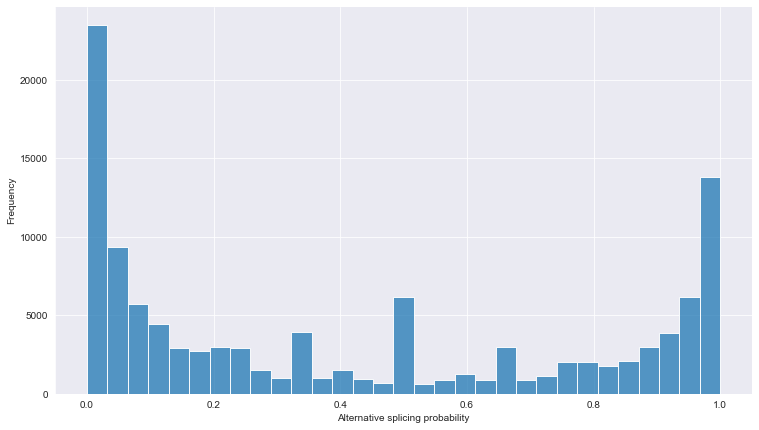

In [71]:
ax = sns.displot(data=final_prob_df, 
              color = 'black', legend = False)
ax.set(xlabel='Alternative splicing probability', ylabel='Frequency')
ax.fig.set_size_inches(12,6)
sns.set_style("darkgrid")

plt.show()

Now that I have the probability string for each group of spliced forms that share a common start position, I need to compute the Shannon entropy for each of those groups. 

Function to calculate Shannon entropy:

In [72]:
import numpy as np
import math
shannon_entropy_values = []

def shannon_entropy(x):
    return x * np.log(x)


In [73]:
individual_SE_SS_minus = list(map(shannon_entropy, prob_string_SS_minus))

In [74]:
sum_t = 225+12
prob1 = 225/sum_t
prob2 = 12/sum_t

shannon_e = (prob1 * np.log(prob1)) + (prob2 * np.log(prob2))
shannon_e = shannon_e * (-1)
shannon_e/np.log(2)


0.28907945973164645

Function to caculate entropy as in Steine-Weiler et al. (2018)

In [75]:
import numpy as np

shannon_entropy_values = []

def shannon_entropy_log2(x):
    return x * np.log2(x)

individual_SE_SS_plus = list(map(shannon_entropy, prob_string_SS_plus))

In [76]:
individual_SE_ST_plus = list(map(shannon_entropy, prob_string_ST_plus))
individual_SE_ST_minus = list(map(shannon_entropy, prob_string_ST_minus))

In [77]:
i = 0
entropia_grupo_lista_SS_plus = []
for i in individual_SE_SS_plus:
    grupo = i
    entropia_grupo = sum(grupo)*-1
    entropia_grupo_lista_SS_plus.append(entropia_grupo)    

In [78]:
i = 0
entropia_grupo_lista_SS_minus = []
for i in individual_SE_SS_minus:
    grupo = i
    entropia_grupo = sum(grupo)*-1
    entropia_grupo_lista_SS_minus.append(entropia_grupo)    

In [79]:
i = 0
entropia_grupo_lista_ST_plus = []
for i in individual_SE_ST_plus:
    grupo = i
    entropia_grupo = sum(grupo)*-1
    entropia_grupo_lista_ST_plus.append(entropia_grupo)    

In [80]:
i = 0
group_entropy_list_ST_minus = []
for i in individual_SE_ST_minus:
    grupo = i
    entropia_grupo = sum(grupo)*-1
    group_entropy_list_ST_minus.append(entropia_grupo)    

In [81]:
not_normalized_entropy_twostrands = entropia_grupo_lista_SS_plus + entropia_grupo_lista_SS_minus +  entropia_grupo_lista_ST_plus + group_entropy_list_ST_minus

In [82]:
not_normalized_entropy_twostrands = pd.DataFrame(not_normalized_entropy_twostrands)

In [83]:
not_normalized_entropy_twostrands.to_csv('not_normalized_entropy_K562_5.csv')

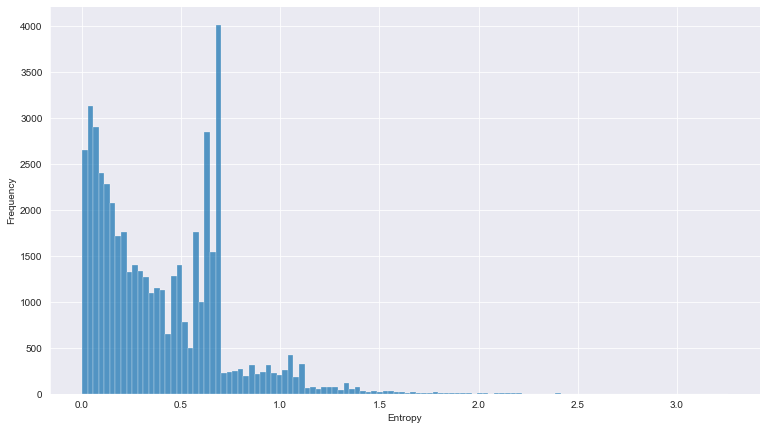

In [84]:
ax = sns.displot(data=not_normalized_entropy_twostrands, 
              color = 'black', legend = False)
ax.set(xlabel='Entropy', ylabel='Frequency')
ax.fig.set_size_inches(12,6)
sns.set_style("darkgrid")

plt.show()

Normalized entropy calculation for the splice junction groups:

In [85]:
i = 0
normalized_entropy_grupo_SS_plus = []
for i in individual_SE_SS_plus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = (sum(grupo)*-1)/np.log(n)
    normalized_entropy_grupo_SS_plus.append(entropia_normalizada_grupo)

In [86]:
i = 0
normalized_entropy_grupo_SS_minus = []
for i in individual_SE_SS_minus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = (sum(grupo)*-1)/np.log(n)
    normalized_entropy_grupo_SS_minus.append(entropia_normalizada_grupo)


In [87]:
i = 0
normalized_entropy_group_ST_plus = []
for i in individual_SE_ST_plus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = ((sum(grupo))*-1)/np.log(n)
    normalized_entropy_group_ST_plus.append(entropia_normalizada_grupo)


In [88]:
i = 0
normalized_entropy_grupo_ST_minus = []
for i in individual_SE_ST_minus:
    grupo = i
    n = len(i)
    entropia_normalizada_grupo = ((sum(grupo))*-1)/(np.log(n))
    normalized_entropy_grupo_ST_minus.append(entropia_normalizada_grupo)


In [89]:
entropy_twostrands = normalized_entropy_grupo_SS_plus + normalized_entropy_grupo_SS_minus + normalized_entropy_group_ST_plus + normalized_entropy_grupo_ST_minus

In [90]:
normalized_entropy_grupo_lista = pd.DataFrame(entropy_twostrands)
normalized_entropy_grupo_lista.to_csv('normalized_entropy_groups_K562_0.csv')

In [91]:
normalized_entropy_grupo_lista.loc[normalized_entropy_grupo_lista[0]>1]

,0
4444,1.0
5528,1.0
11665,1.0
12843,1.0
21633,1.0
23616,1.0
24722,1.0
24768,1.0
24821,1.0
31574,1.0


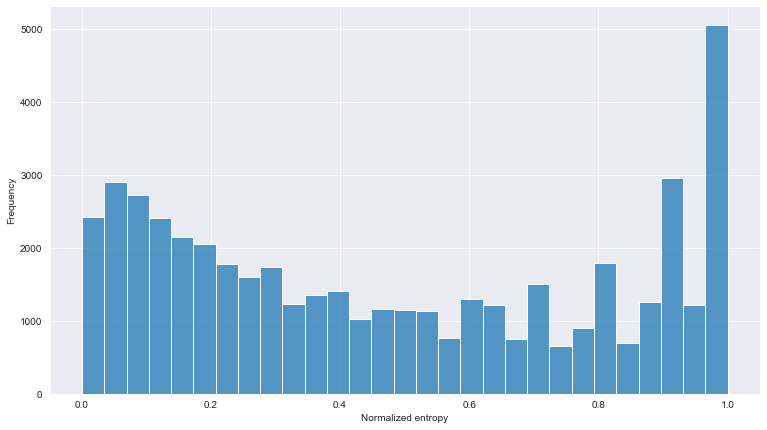

In [92]:
ax = sns.displot(data=normalized_entropy_grupo_lista, 
              color = 'black', legend = False)
ax.set(xlabel='Normalized entropy', ylabel='Frequency')
ax.fig.set_size_inches(12,6)
sns.set_style("darkgrid")

plt.show()